# Project BDM500
### Nadimul Hasan
### ID: 130497217

#### Prediction Techniques:
To predict if an employee will leave the company or not, we will use Logistic regression. Logistic regression is a machine learning algorithm used to predict the probability that an observation belongs to one of two possible classes. By exploring the decision boundary, we can have a better understanding of which factors affect our model. Finally, a BI dashboard, will help company officials informed about the situation.

In [1]:
#1 =left
# 0 = stay

In [2]:
#Importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, accuracy_score,roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from scipy.stats import norm, boxcox

In [3]:
#Importing Data
hr = pd.read_csv('hr_data.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low


#### Data Information
Dataset contains 15000 rows and 10 columns <br/>
8 columns are numeric <br/>
2 columns are categorical

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14975 non-null  float64
 1   last_evaluation        14970 non-null  float64
 2   number_project         14959 non-null  float64
 3   average_montly_hours   14971 non-null  float64
 4   time_spend_company     14975 non-null  float64
 5   Work_accident          14988 non-null  float64
 6   left                   14979 non-null  float64
 7   promotion_last_5years  14981 non-null  float64
 8   Department             14961 non-null  object 
 9   salary                 14980 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.1+ MB


#### Catergories

In [5]:
#Type of each categories and their values
print(hr['Department'].value_counts(), '\n')
print(hr['salary'].value_counts())

sales          4132
technical      2714
support        2217
IT             1221
product_mng     899
marketing       857
RandD           786
accounting      767
hr              738
management      630
Name: Department, dtype: int64 

low       7314
medium    6435
high      1231
Name: salary, dtype: int64


Data contains 6 categories for Department and 3 types of salary. 
- Sales has the highest number of employees
- Sales, technical and support have similar range of salary(low)

In [6]:
#Basic Statistics
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14975.000000,14970.000000,14959.000000,14971.000000,14975.000000,14988.000000,14979.000000,14981.000000
mean,0.612825,0.716172,3.803262,201.038274,3.498631,0.144516,0.238267,0.021294
std,0.248684,0.171149,1.232878,49.939949,1.460575,0.351624,0.426037,0.144366
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Basic Statistics
- As we can see more than 50% of employees have a satisfaction level of over 0.6.
- Average time spent in the company is higher than the 50th perecntile, this means that there are newer employees.

#### Check correlations between the variables

In [7]:
corr_matrix = hr.corr()
corr_matrix

#Check correlation between target variable and other variables
corr_matrix['left'].sort_values(ascending=False)

left                     1.000000
time_spend_company       0.144636
average_montly_hours     0.071356
number_project           0.024370
last_evaluation          0.007015
promotion_last_5years   -0.061901
Work_accident           -0.154716
satisfaction_level      -0.388753
Name: left, dtype: float64

<AxesSubplot:>

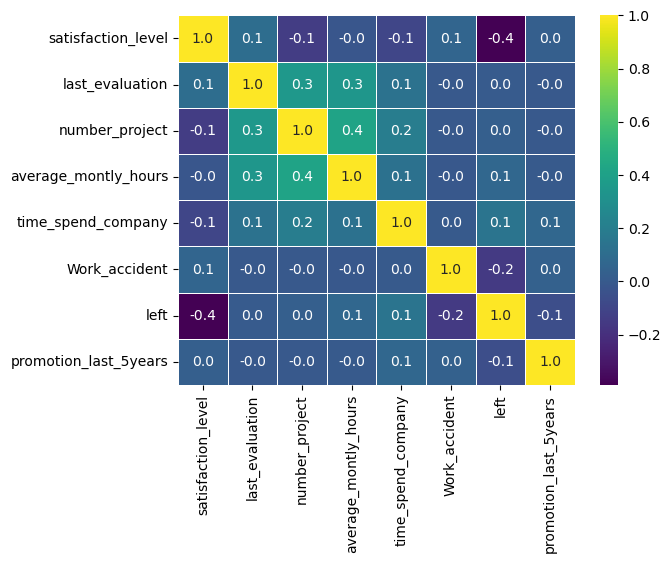

In [8]:
# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)

#### Filling null values with mean and 0 to numerical data
#### Droping rows with null values for categorical data and target variable
Here only 3 rows should be filled with mean as they have low deviation

In [9]:
#Check null values
hr.isnull().sum()

satisfaction_level       24
last_evaluation          29
number_project           40
average_montly_hours     28
time_spend_company       24
Work_accident            11
left                     20
promotion_last_5years    18
Department               38
salary                   19
dtype: int64

In [10]:
def fill_mean(cols):
    #Creating a function to fill null values with mean 
    for col in cols:
        hr[col].fillna(hr[col].mean(), inplace=True)
    return
    
fill_mean(['satisfaction_level', 'average_montly_hours','number_project'])
hr[['last_evaluation','time_spend_company','Work_accident','promotion_last_5years']]= hr[['last_evaluation',
                                                                                          'time_spend_company',
                                                                                          'Work_accident',
                                                                                          'promotion_last_5years']].fillna(0)
hr.dropna(inplace=True)
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Visulization

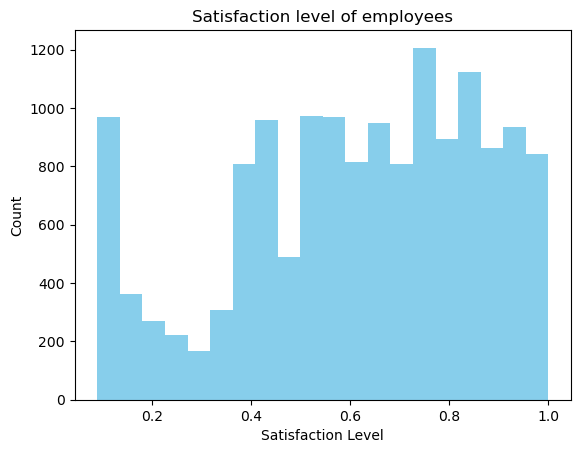

In [11]:
plt.hist(hr['satisfaction_level'], 20, color='skyblue')

# Set labels and title
plt.ylabel('Count')
plt.xlabel('Satisfaction Level')
plt.title('Satisfaction level of employees')

plt.show()

This shows that most employees have satisfaction level of over 50%. Now we will look at people who has more than 50% satisfaction but left the company.

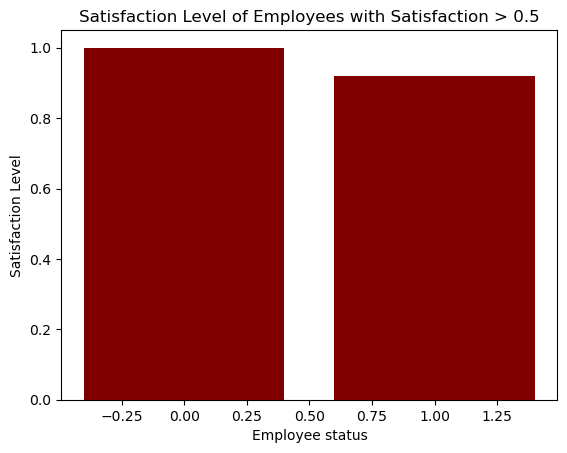

In [12]:
# Filter the DataFrame based on satisfaction_level
filt = hr[hr['satisfaction_level'] > 0.5]

# Create a bar chart using the filtered DataFrame
plt.bar(filt['left'], filt['satisfaction_level'], color='maroon')

# Set labels and title
plt.xlabel('Employee status')
plt.ylabel('Satisfaction Level')
plt.title('Satisfaction Level of Employees with Satisfaction > 0.5')

plt.show()

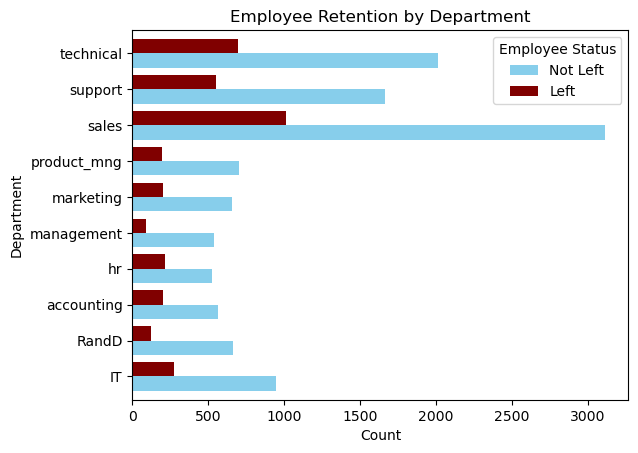

In [13]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(hr['Department'], hr['left'])

# Create a stacked bar chart
cross_tab.plot(kind='barh', color=['skyblue', 'maroon'], width=0.8)

# Set labels and title
plt.ylabel('Department')
plt.xlabel('Count')
plt.title('Employee Retention by Department')

# Set legend
plt.legend(['Not Left', 'Left'], title='Employee Status')

# Show the plot
plt.show()


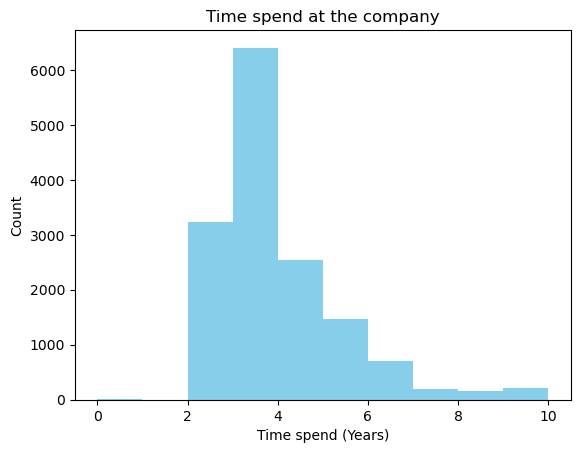

In [14]:
plt.hist(hr['time_spend_company'], color='skyblue')

# Set labels and title
plt.ylabel('Count')
plt.xlabel('Time spend (Years)')
plt.title('Time spend at the company')
plt.show()

This shows that most employees have 2-6 years of experience in the company. We can look at the employee who stayed more than 6 years but still left.

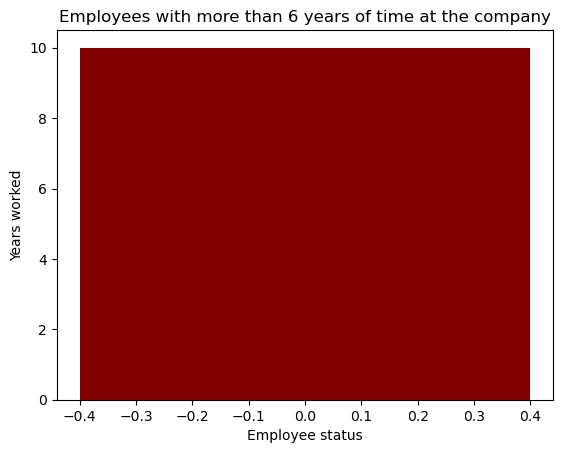

In [15]:
# Filter the DataFrame based on satisfaction_level
filt = hr[hr['time_spend_company'] > 6]

# Create a bar chart using the filtered DataFrame
plt.bar(filt['left'], filt['time_spend_company'], color='maroon')

# Set labels and title
plt.xlabel('Employee status')
plt.ylabel('Years worked')
plt.title('Employees with more than 6 years of time at the company')

plt.show()

Surprisingly, no employee with more than 6+ years of job time left the company. We can remove these data from our dataset because they will not affect our model. Thus, reducing our computing time.

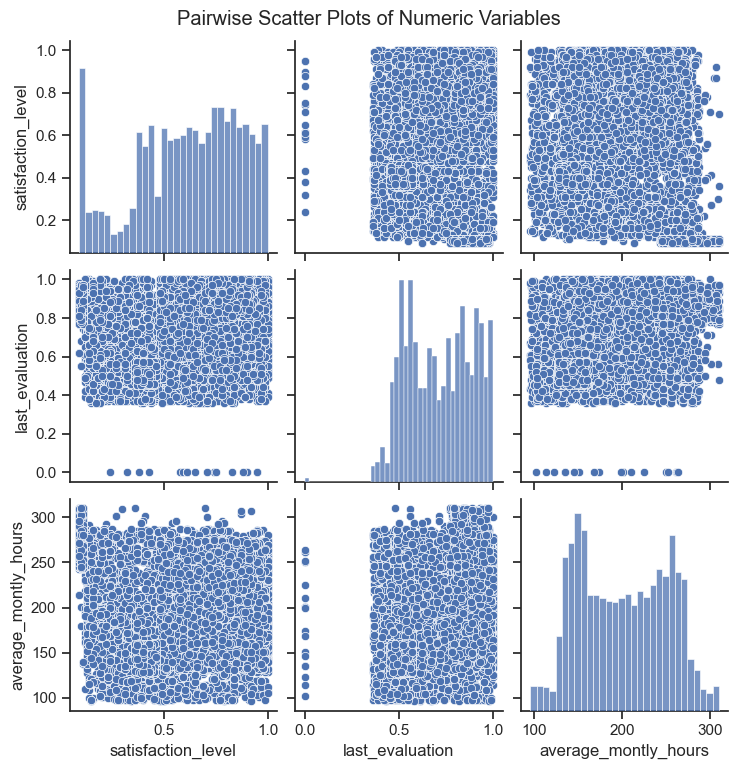

In [16]:
sns.set(style="ticks")
sns.pairplot(hr[['satisfaction_level', 'last_evaluation','average_montly_hours']])
plt.suptitle('Pairwise Scatter Plots of Numeric Variables', y=1.02)
plt.show()

### Outlier detection

We will use z-scores to detect outliers

In [17]:
mean = np.mean(hr['satisfaction_level'])
std = np.std(hr['satisfaction_level'])
    
# Calculate the Z-scores for each data point
z_scores = (hr['satisfaction_level'] - mean) / std
    
# Identify outliers based on the threshold
outliers = hr[abs(z_scores) > 3]
hr = hr[~hr.index.isin(outliers.index)]
hr.shape

(14941, 10)

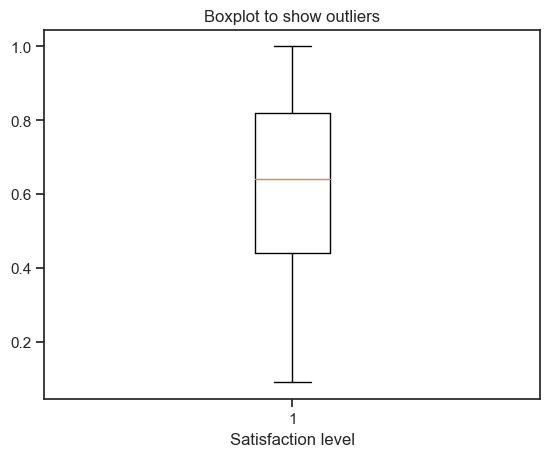

In [37]:
plt.boxplot(hr['satisfaction_level'])
plt.title('Boxplot to show outliers')
plt.xlabel('Satisfaction level')
plt.show()

### Checking skewness of data

In [19]:
from scipy.stats import skew

print('Skewness of each column \n')
for col in list(hr.columns[:7]):
    print(f'{col}: {skew(hr[col])}')

Skewness of each column 

satisfaction_level: -0.47691398157389736
last_evaluation: -0.11225813023147913
number_project: 0.33930733660807144
average_montly_hours: 0.052511724413554194
time_spend_company: 1.8260929837464435
Work_accident: 2.0244994476484837
left: 1.2282707091805485


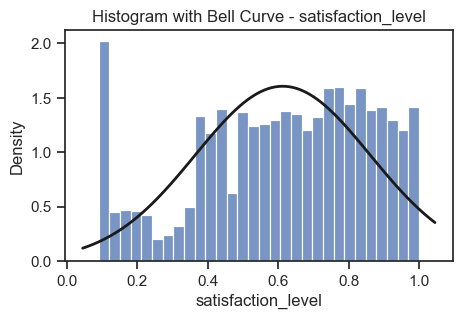

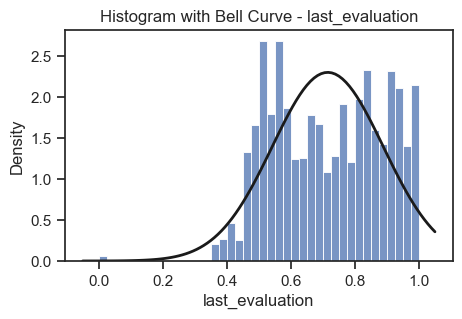

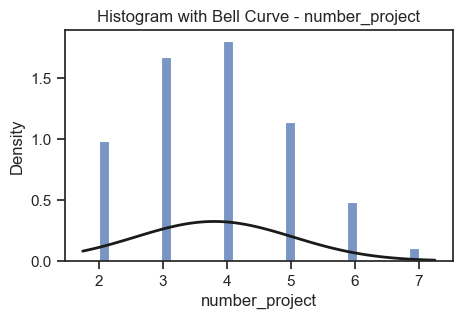

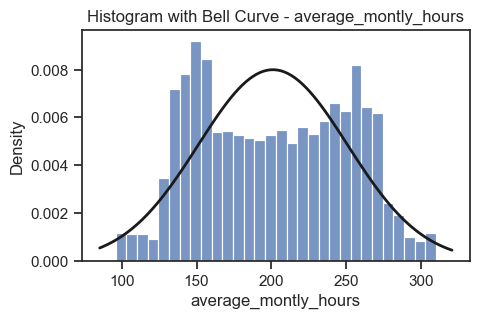

In [20]:
for column in hr.columns[:4]:
    plt.figure(figsize=(5, 3))
    sns.histplot(hr[column], stat="density")

    # Fitting a normal distribution curve
    mu, std = norm.fit(hr[column])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.title(f'Histogram with Bell Curve - {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

    plt.show()

It seems that time_spend in the company is skewed to the the right or has positive skewness.The last 3 columns show Yes or No answers, thus has 0 and 1 vaues.

### Transforming skewed data

In [21]:
hr['last_evaluation'].values

array([0.53, 0.86, 0.88, ..., 0.53, 0.96, 0.52])

In [22]:
#Choosing column to transform
col = ['last_evaluation']
# Adding 1 to handle zero error
hr[col]  = hr[col]+1
hr[col] = hr[col].apply(lambda x: boxcox(x )[0])

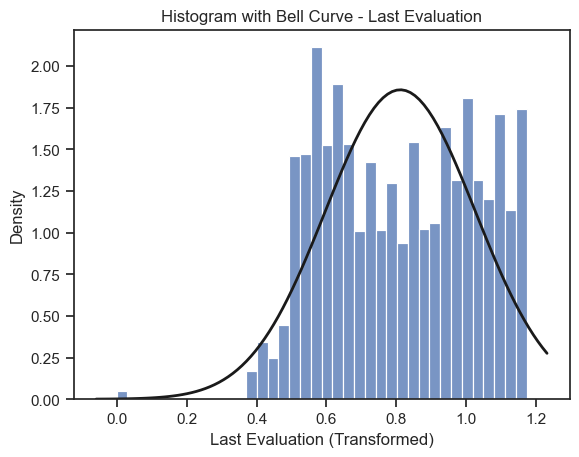

In [36]:
# plotting histogram to show transformed data
sns.histplot(hr['last_evaluation'], stat="density")
# Fitting a normal distribution curve
mu, std = norm.fit(hr['last_evaluation'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title(f'Histogram with Bell Curve - Last Evaluation')
plt.xlabel('Last Evaluation (Transformed)')
plt.show()

We can see data is much more normalized now. Transforming other columns will not make much difference.

Data looks little right skewed. All the data points are now with 3 standard deviations of the mean satisfaction level.

### Encoding

In [24]:
# Using Label Encoder to encode categorical values
le = LabelEncoder()
ordinal_encoder = OrdinalEncoder(categories=[["low", "medium", "high"]])
hr['salary'] = ordinal_encoder.fit_transform(hr[['salary']])
hr['Department'] = le.fit_transform(hr['Department'])

### Modeling

In [30]:
# Determine dependent and independent variable
X = hr.drop('left', axis =1)
y = hr['left']
#y = (y == 2.0).astype(int)
# Split data into train and test states
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.3)

### Model Selection

In [31]:
lg = LogisticRegression()
svc = svm.SVC()
rfc = RandomForestClassifier()

lg.fit(X_train, y_train)
svc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

lg_pre = lg.predict(X_test)
svc_pre = svc.predict(X_test)
rfc_pre = rfc.predict(X_test)

C:\Users\raiai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate the performance of the models

In [32]:
def performance(clf):
    #Function to evaluate performance
    for model, predict in clf:
        print(model,'scores:')
        print(classification_report(y_test, predict))
        print(f'Accuracy {model}:{(accuracy_score(y_test, predict)).round(3)*100}%')
        print(confusion_matrix(y_test, predict))
        print(' ')

In [33]:
classifiers_and_predictions = [
    ['Logistic Regression', lg_pre],
    ['SVC', svc_pre],
    ['Random Forest Classifier', rfc_pre]
]
performance(classifiers_and_predictions)

Logistic Regression scores:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86      3402
         1.0       0.57      0.31      0.40      1081

    accuracy                           0.78      4483
   macro avg       0.69      0.62      0.63      4483
weighted avg       0.75      0.78      0.75      4483

Accuracy Logistic Regression:77.8%
[[3154  248]
 [ 746  335]]
 
SVC scores:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.87      3402
         1.0       0.97      0.09      0.16      1081

    accuracy                           0.78      4483
   macro avg       0.87      0.54      0.52      4483
weighted avg       0.82      0.78      0.70      4483

Accuracy SVC:78.0%
[[3399    3]
 [ 985   96]]
 
Random Forest Classifier scores:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3402
         1.0       0.99      0.97      0.98      108

In [38]:
# Choose the number of folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(rfc, X, y, cv=kfold, scoring='accuracy')

# Print the average performance
print("Average Accuracy Random Forest: {:.2f}%".format(scores.mean() * 100))

Average Accuracy Random Forest: 99.18%


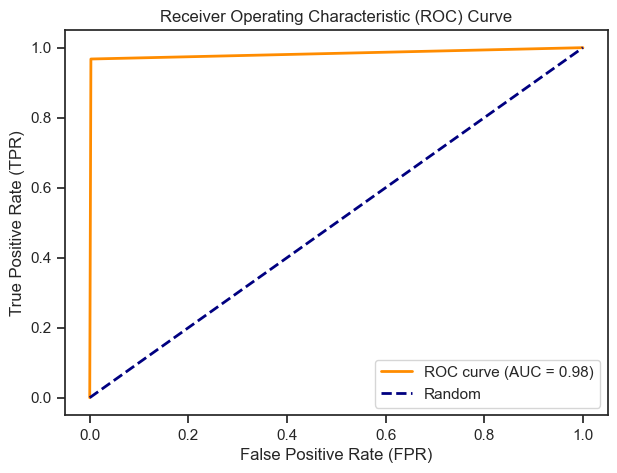

In [40]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rfc_pre)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()